# **Library's Import**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import classification_report


# **EDA**

1.Uploading CSV file.

2.Info.

3.Rows and Column.

4.Head & tail.

5.Null values.

6.Duplicate values.

7.describe(statistical data)

8.nunique Values all rows

**Uploading the file**

In [ ]:
data=pd.read_csv("/content/student_exam_data[1].csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**1.**We can see the there are some numerical value in data set.

**2.**Our target vairable is " Pass/Fail"

In [ ]:
print("number of row",data.shape[0])
print("number of columns",data.shape[1])

number of row 500
number of columns 3


In the data set there are **500 Rows**(Horizontal),and **3 column**(Vertical)

In [ ]:
data.head()


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


**First five Rows & Columns**

In [ ]:
data.tail()

,Study Hours,Previous Exam Score,Pass/Fail
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1
499,9.875897,66.760346,1


**last five Rows & Columns**

In [ ]:
data.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

**Sum of the null value**

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

There are no duplicate values in the data set.

In [ ]:
data.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


we calculate statistical data.

In [ ]:
data.nunique()

Study Hours            500
Previous Exam Score    500
Pass/Fail                2
dtype: int64

nunique value

# **Visualization**

In [ ]:
data1=data['Pass/Fail'].value_counts()
size=data['Pass/Fail'].value_counts()
print(data1)
print(size)

0    316
1    184
Name: Pass/Fail, dtype: int64
0    316
1    184
Name: Pass/Fail, dtype: int64


([<matplotlib.patches.Wedge at 0x79064c124490>,
 [Text(-0.44319717128295216, 1.0067652493837824, ''),
  Text(0.4431972655431159, -1.006765207888664, '')],
 [Text(-0.24174391160888298, 0.5491446814820631, '63.2%'),
  Text(0.24174396302351772, -0.5491446588483622, '36.8%')])

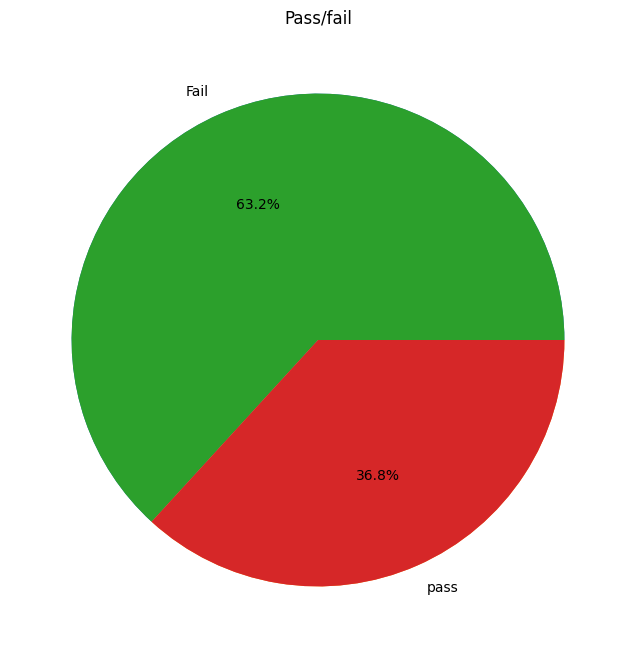

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(data1, labels=["Fail", "pass"])
plt.title("Pass/fail")
plt.pie(size, autopct="%.1f%%")


 1.we can see that our target vairable distribution is highly imblanced.

2.Majority of the studenta is fail (63.2%).

3.Only (36.8%) has pass.

<Axes: xlabel='Previous Exam Score', ylabel='Count'>

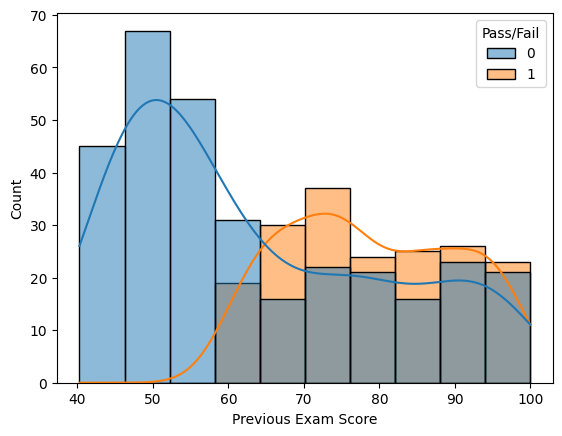

In [ ]:
sns.histplot(data=data,x="Previous Exam Score",hue="Pass/Fail",kde=True, bins=10)

Those students are get more than 78.86 score in previous exam have higher chances of pass.

In [ ]:
data.groupby("Pass/Fail")["Previous Exam Score"].mean()

Pass/Fail
0    63.123158
1    78.867522
Name: Previous Exam Score, dtype: float64

In [ ]:
data[data["Previous Exam Score"]>63.123158]

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
3,6.387926,88.827701,1
4,2.404168,81.083870,0
6,1.522753,94.655631,0
...,...,...,...
491,6.581193,81.681788,1
493,2.693090,75.413840,0
496,6.252905,95.038815,1
498,9.769553,97.014241,1


<Axes: xlabel='Study Hours', ylabel='Count'>

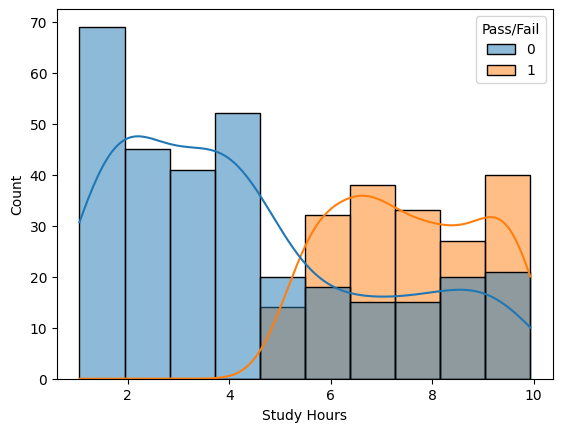

In [ ]:
sns.histplot(data=data, x="Study Hours", hue="Pass/Fail", bins=10, kde=True)

Those students are study  more than 7.5 hours have higher chances of pass otherwise fail.

In [ ]:
data.groupby("Pass/Fail")["Study Hours"].mean()

Pass/Fail
0    4.291317
1    7.540606
Name: Study Hours, dtype: float64

In [ ]:
data[data["Study Hours"]>4.291317]

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
7,8.795585,89.352235,1
...,...,...,...
491,6.581193,81.681788,1
494,5.173286,61.658434,1
496,6.252905,95.038815,1
498,9.769553,97.014241,1


<Axes: ylabel='Study Hours'>

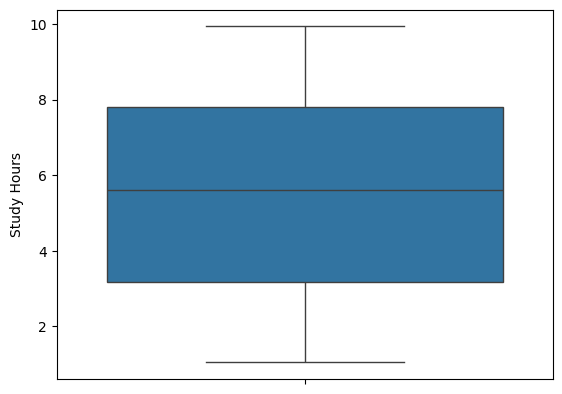

In [ ]:
sns.boxplot(data["Study Hours"])

<Axes: ylabel='Previous Exam Score'>

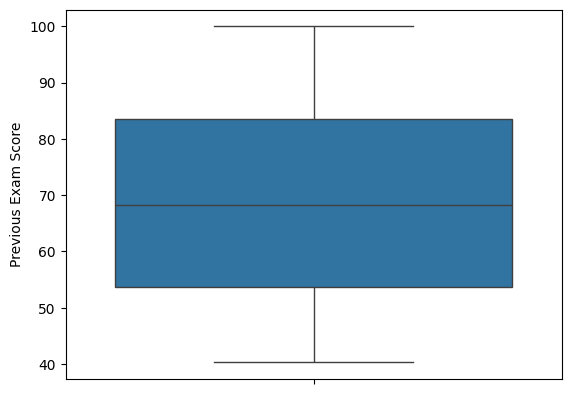

In [ ]:
sns.boxplot(data["Previous Exam Score"])

There are no outliear present.

<Axes: >

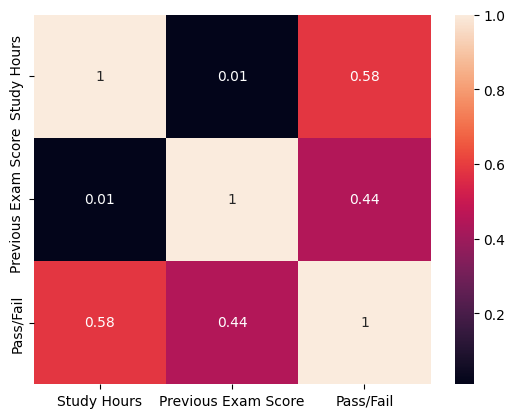

In [ ]:
sns.heatmap(data.corr(),annot=True)

# **Processing**

In [ ]:
X=data.drop(columns=["Pass/Fail"],axis=1)
Y=data["Pass/Fail"]

spliting into independent & Dependent Feature

In [ ]:
column=["Study Hours","Previous Exam score"]

Now, we create an object for the numeric feature.

In [ ]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
Y_train.value_counts()

0    255
1    145
Name: Pass/Fail, dtype: int64

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=10)

In [ ]:
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
Y_train_os.value_counts()

1    255
0    255
Name: Pass/Fail, dtype: int64

# **Model Build**

1.KNeighborsClassifier

2.Logistic Regression

3.Support Vector Machine (SVM)

**KNeighborsClassifier**

**------------------------**

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN.fit(X_train_os,Y_train_os)

KNeighborsClassifier()

In [ ]:
KNN_pred = KNN.predict(X_test)
KNN_cm= confusion_matrix(Y_test,KNN_pred)
KNN_acc= accuracy_score(Y_test,KNN_pred)*100
KNN_prec=precision_score(Y_test,KNN_pred)*100
KNN_rec=recall_score(Y_test,KNN_pred)*100
KNN_f1=f1_score(Y_test,KNN_pred)*100
# print("KNN.predict: ",KNN_pred)
print("confusion_matrix: \n", KNN_cm)
print("accuracy_score: ", KNN_acc)
print("precision_score: ", KNN_prec)
print("recall_score: ", KNN_rec)
print("f1_score: ", KNN_f1)

confusion_matrix: 
 [[60  1]
 [ 1 38]]
accuracy_score:  98.0
precision_score:  97.43589743589743
recall_score:  97.43589743589743
f1_score:  97.43589743589743


In [ ]:
print(classification_report(Y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        39

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



**Logistic Regression**

**---------------------------**

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(X_train_os,Y_train_os)

LogisticRegression()

In [ ]:
log_pred = log.predict(X_test)
log_cm= confusion_matrix(Y_test,log_pred)
log_acc= accuracy_score(Y_test,log_pred)*100
log_prec=precision_score(Y_test,log_pred)*100
log_rec=recall_score(Y_test,log_pred)*100
log_f1=f1_score(Y_test,log_pred)*100
print("confusion_matrix: \n", log_cm)
print("accuracy_score: ", log_acc)
print("precision_score: ", log_prec)
print("recall_score: ", log_rec)
print("f1_score: ", log_f1)

confusion_matrix: 
 [[51 10]
 [ 3 36]]
accuracy_score:  87.0
precision_score:  78.26086956521739
recall_score:  92.3076923076923
f1_score:  84.70588235294117


In [ ]:
print(classification_report(Y_test,log_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        61
           1       0.78      0.92      0.85        39

    accuracy                           0.87       100
   macro avg       0.86      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



**Support Vector Machine (SVM)**

**-------------------------------------**

In [ ]:
svm=SVC()

In [ ]:
svm.fit(X_train_os, Y_train_os)

SVC()

In [ ]:
svm_pred = svm.predict(X_test)
svm_cm= confusion_matrix(Y_test,svm_pred)
svm_acc= accuracy_score(Y_test,svm_pred)*100
svm_prec=precision_score(Y_test,svm_pred)*100
svm_rec=recall_score(Y_test,svm_pred)*100
svm_f1=f1_score(Y_test,svm_pred)*100
print("confusion_matrix: \n", svm_cm)
print("accuracy_score: ", svm_acc)
print("precision_score: ", svm_prec)
print("recall_score: ", svm_rec)
print("f1_score: ", svm_f1)

confusion_matrix: 
 [[54  7]
 [ 1 38]]
accuracy_score:  92.0
precision_score:  84.44444444444444
recall_score:  97.43589743589743
f1_score:  90.47619047619048


In [ ]:
final_data = pd.DataFrame({"MODEL": ["KNeighborsClassifier", "LogisticRegression", "SVM"],
                           "Accuracy": [accuracy_score(Y_test,KNN_pred)*100,
                                        accuracy_score(Y_test,log_pred)*100,
                                        accuracy_score(Y_test,svm_pred)*100],
                           "Precision": [precision_score(Y_test, KNN_pred)*100,
                                         precision_score(Y_test, log_pred)*100,
                                         precision_score(Y_test,svm_pred)*100],
                           "Recall": [recall_score(Y_test, KNN_pred)*100,
                                      recall_score(Y_test, log_pred)*100,
                                      recall_score(Y_test,svm_pred)*100],
                           "f1-score": [f1_score(Y_test, KNN_pred)*100,
                                        f1_score(Y_test, log_pred)*100,
                                        f1_score(Y_test,svm_pred)*100]})

In [ ]:
final_data

,MODEL,Accuracy,Precision,Recall,f1-score
0,KNeighborsClassifier,98.0,97.435897,97.435897,97.435897
1,LogisticRegression,87.0,78.260870,92.307692,84.705882
2,SVM,92.0,84.444444,97.435897,90.476190


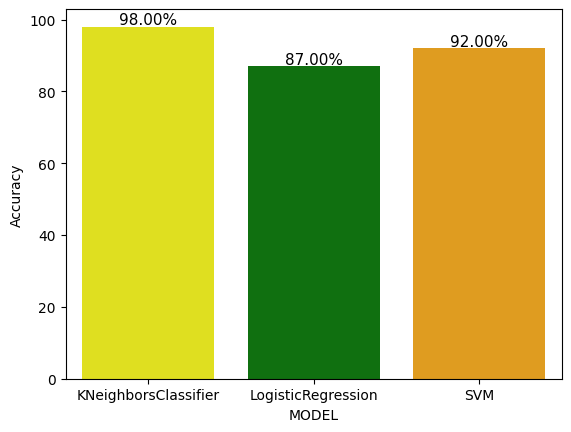

In [ ]:
custom_palette = ["yellow", "green", "orange"]
barplot = sns.barplot(x="MODEL", y="Accuracy", data=final_data, palette=custom_palette)
for p in barplot.patches:
    barplot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')